In [1]:
import os
import sys
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pylab as plt
from common.gradient import numerical_gradient

In [2]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

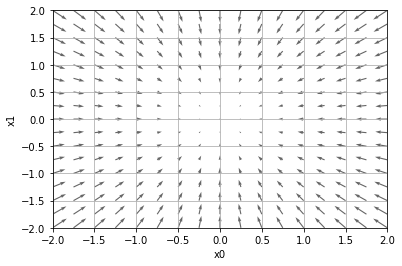

In [3]:
# Draw the gradients plot
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]))

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1], angles='xy', color='#666666')

plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

In [4]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

In [5]:
print(gradient_descent(function_2, np.array([-3.0, 4.0]), lr=0.1, step_num=100)[0])

[ -6.11110793e-10   8.14814391e-10]


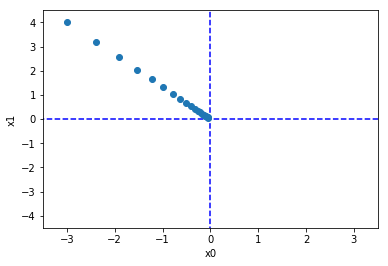

In [6]:
# Draw the updating process
init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

## What happen if using too high/low learning rate?

In [7]:
# With high LR: lr=10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)[0])

# Low LR: lr=1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)[0])

[ -2.58983747e+13  -1.29524862e+12]
[-2.99999994  3.99999992]
